In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the iris dataset from a CSV file
data = pd.read_csv('Iris.csv')

In [2]:
# Separate features and labels
X = data.iloc[:, :-1]  # Assuming the last column is the label
y = data.iloc[:, -1]

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [4]:
# Create and train the k-NN classifier
k = 3  # You can choose any k value
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
# Make predictions
y_pred = knn.predict(X_test)

In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [7]:
# Print correct and wrong predictions
correct_predictions = []
wrong_predictions = []

for i in range(len(y_test)):
    if y_test.iloc[i] == y_pred[i]:
        correct_predictions.append((X_test.iloc[i].tolist(), y_test.iloc[i], y_pred[i]))
    else:
        wrong_predictions.append((X_test.iloc[i].tolist(), y_test.iloc[i], y_pred[i]))

print("\nCorrect Predictions:")
for features, true_label, predicted_label in correct_predictions:
    print(f'Features: {features}, True Label: {true_label}, Predicted Label: {predicted_label}')

print("\nWrong Predictions:")
for features, true_label, predicted_label in wrong_predictions:
    print(f'Features: {features}, True Label: {true_label}, Predicted Label: {predicted_label}')


Correct Predictions:
Features: [89.0, 5.6, 3.0, 4.1, 1.3], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [73.0, 6.3, 2.5, 4.9, 1.5], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [21.0, 5.4, 3.4, 1.7, 0.2], True Label: Iris-setosa, Predicted Label: Iris-setosa
Features: [17.0, 5.4, 3.9, 1.3, 0.4], True Label: Iris-setosa, Predicted Label: Iris-setosa
Features: [148.0, 6.5, 3.0, 5.2, 2.0], True Label: Iris-virginica, Predicted Label: Iris-virginica
Features: [141.0, 6.7, 3.1, 5.6, 2.4], True Label: Iris-virginica, Predicted Label: Iris-virginica
Features: [114.0, 5.7, 2.5, 5.0, 2.0], True Label: Iris-virginica, Predicted Label: Iris-virginica
Features: [24.0, 5.1, 3.3, 1.7, 0.5], True Label: Iris-setosa, Predicted Label: Iris-setosa
Features: [13.0, 4.8, 3.0, 1.4, 0.1], True Label: Iris-setosa, Predicted Label: Iris-setosa
Features: [69.0, 6.2, 2.2, 4.5, 1.5], True Label: Iris-versicolor, Predicted Label: Iris-versicolor
Features: [40

In [8]:
# Visualize the correct and wrong predictions using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

In [9]:
correct_indices = [i for i in range(len(y_test)) if y_test.iloc[i] == y_pred[i]]
wrong_indices = [i for i in range(len(y_test)) if y_test.iloc[i] != y_pred[i]]

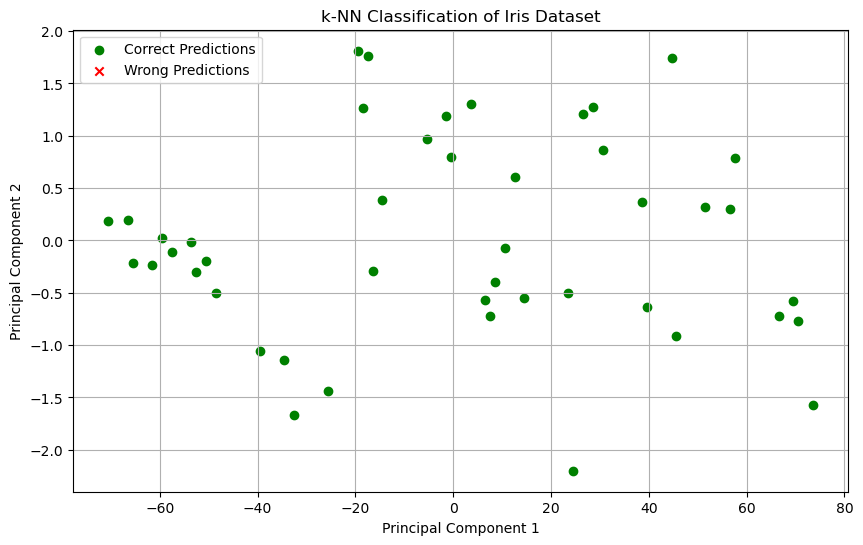

In [10]:
plt.figure(figsize=(10, 6))

# Plot correct predictions
plt.scatter(X_test_pca[correct_indices, 0], X_test_pca[correct_indices, 1],
            color='green', marker='o', label='Correct Predictions')

# Plot wrong predictions
plt.scatter(X_test_pca[wrong_indices, 0], X_test_pca[wrong_indices, 1],
            color='red', marker='x', label='Wrong Predictions')

plt.title('k-NN Classification of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()